#  Baseline Model Tpot으로 진행 

In [1]:
import sys
sys.path.append('../') 

In [2]:
from pipeline import Solar_pipeline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Tpot Sample Test

In [ ]:
from tpot import TPOTRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

sample_ = pd.read_csv('../data/Standard.csv')
sample_y = sample_['Thickness']
sample_x = sample_.drop(['Thickness'], axis=1)

sample_x_train, sample_x_test, sample_y_train, sample_y_test = train_test_split(sample_x, sample_y, test_size=0.3, random_state=42)

sample_tpot = TPOTRegressor(generations=5, population_size=50, verbosity=2, cv=10, random_state=42)
sample_tpot.fit(sample_x_train, sample_y_train)

sample_y_pred = sample_tpot.predict(sample_x_test)

mse = mean_squared_error(sample_y_test, sample_y_pred)
print(mse)

In [ ]:
rmse = mse**(1/2)
rmse

In [ ]:
sample_2_ = pd.read_csv('../data/Standard_w_B.csv')
sample_2_y = sample_2_['Thickness']
sample_2_x = sample_2_.drop(['Thickness'], axis=1)

sample_2_x_train, sample_2_x_test, sample_2_y_train, sample_2_y_test = train_test_split(sample_2_x, sample_2_y, test_size=0.3, random_state=42)

sample_2_tpot = TPOTRegressor(generations=5, population_size=50, verbosity=2, cv=10,random_state=42)
sample_2_tpot.fit(sample_2_x_train, sample_2_y_train)

sample_2_y_pred = sample_2_tpot.predict(sample_2_x_test)

mse_2 = mean_squared_error(sample_2_y_test, sample_2_y_pred)
print(mse_2)
rmse_2 = np.sqrt(mse_2)

print(rmse_2)

# Standard
Top R,G,B 평균 -> Thickness 예측

In [3]:
tpot = True
trial_name = 'tpot_Standard/'
dataset = pd.read_csv('../data/Standard.csv')
hyperparams_path = '../hyperparams.json'
model_path = './model/' + trial_name
pred_path = './prediction/' + trial_name
target_name = 'Thickness'
Except_models = None
test_size = 0.3
random_state = 42

SP1 = Solar_pipeline(dataset, target_name, hyperparams_path, model_path, pred_path,
                    tpot=tpot, except_model = Except_models, test_size=test_size, random_state=random_state)

In [4]:
SP1.display_dataset()

,Top_R,Top_G,Top_B,Thickness
0,11.6946,10.9098,8.1691,48.266667
1,12.3677,12.7517,11.2189,47.966667
2,12.6729,12.8985,9.9953,48.166667
3,11.4028,11.4436,8.6145,48.600000
4,5.5140,3.0513,1.7067,59.533333


In [5]:
SP1.fit()

Version 0.12.0 of tpot is outdated. Version 0.12.1 was released Tuesday August 15, 2023.


Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Best pipeline: AdaBoostRegressor(input_matrix, learning_rate=1.0, loss=exponential, n_estimators=100)
R2       0.857040
RMSE     9.274735
MSE     86.020705
MAE      6.061548
MAPE     5.917632
Name: tpot, dtype: float64


In [8]:
SP1.display_perf_table(metric = 'RMSE')

,R2,RMSE,MSE,MAE,MAPE
tpot,0.85704,9.27473,86.0207,6.06155,5.91763


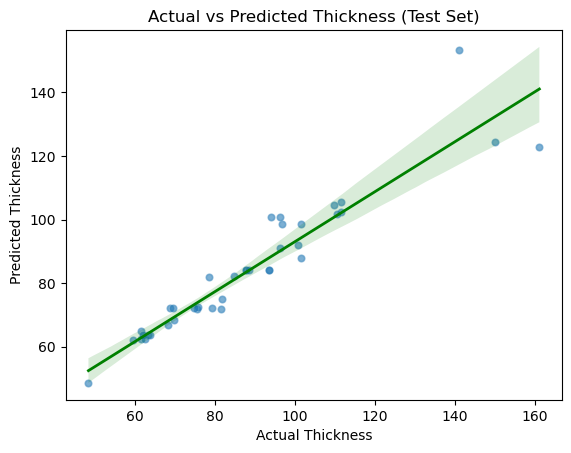

In [9]:
best_model, y_pred, test_pred = SP1.summarize(metric='RMSE')

# Standard_w_B
Top, Bot RGB 평균 -> Thickness 예측

In [10]:
trial_name = 'tpot_Standard_w_B/'
dataset = pd.read_csv('../data/Standard_w_B.csv')
hyperparams_path = '../hyperparams.json'
model_path = './model/' + trial_name
pred_path = './prediction/' + trial_name
target_name = 'Thickness'
Except_models = None
test_size = 0.3
random_state = 42

SP2 = Solar_pipeline(dataset, target_name, hyperparams_path, model_path, pred_path,
                    tpot=tpot, except_model = Except_models, test_size=test_size, random_state=random_state)

In [11]:
SP2.display_dataset()

,Top_R,Top_G,Top_B,Bot_R,Bot_G,Bot_B,Thickness
0,11.6946,10.9098,8.1691,30.0046,37.9564,49.9154,48.266667
1,12.3677,12.7517,11.2189,25.7097,34.7937,43.0995,47.966667
2,12.6729,12.8985,9.9953,31.0536,35.7752,41.5669,48.166667
3,11.4028,11.4436,8.6145,24.9250,32.4114,39.4482,48.600000
4,5.5140,3.0513,1.7067,25.9343,32.6192,38.1195,59.533333


In [12]:
SP2.fit()

Version 0.12.0 of tpot is outdated. Version 0.12.1 was released Tuesday August 15, 2023.


Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Best pipeline: AdaBoostRegressor(LassoLarsCV(input_matrix, normalize=True), learning_rate=0.1, loss=linear, n_estimators=100)
R2       0.950238
RMSE     5.471975
MSE     29.942509
MAE      4.252325
MAPE     4.662945
Name: tpot, dtype: float64


In [13]:
SP2.display_perf_table(metric = 'RMSE')

,R2,RMSE,MSE,MAE,MAPE
tpot,0.95024,5.47197,29.94251,4.25232,4.66294


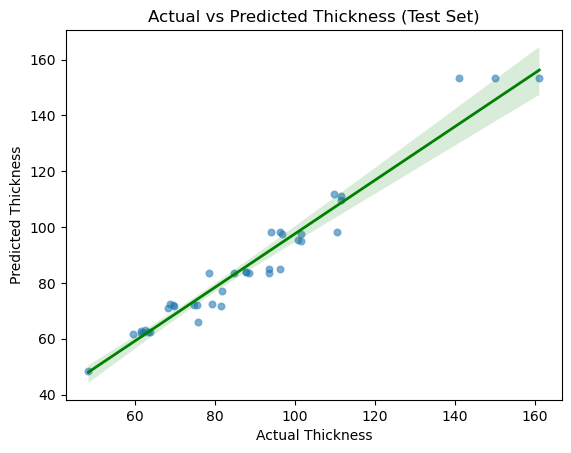

In [14]:
best_model, y_pred, test_pred = SP2.summarize(metric='RMSE')

# Correction Methods


## Histogram Equalization

Top RGB 평균 + Histogram equalization -> Thickness 예측

In [15]:
trial_name = 'tpot_Histogram_Equalization/'
dataset = pd.read_csv('../data/Histogram_Equalization.csv')
hyperparams_path = '../hyperparams.json'
model_path = './model/' + trial_name
pred_path = './prediction/' + trial_name
target_name = 'Thickness'
Except_models = None
test_size = 0.3
random_state = 42

SP3 = Solar_pipeline(dataset, target_name, hyperparams_path, model_path, pred_path,
                    tpot=tpot, except_model = Except_models, test_size=test_size, random_state=random_state)

In [16]:
SP3.display_dataset()

,Top_R,Top_G,Top_B,Thickness
0,140.5183,139.7240,137.0516,48.266667
1,139.2869,139.6661,138.1536,47.966667
2,139.9864,140.2005,137.4057,48.166667
3,140.2039,140.1815,137.5420,48.600000
4,146.7461,144.1289,143.1082,59.533333


In [17]:
SP3.fit()

Version 0.12.0 of tpot is outdated. Version 0.12.1 was released Tuesday August 15, 2023.


Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -90.47783708040477

Generation 2 - Current best internal CV score: -90.47783708040477

Generation 3 - Current best internal CV score: -90.47783708040477

Generation 4 - Current best internal CV score: -90.47783708040477

Generation 5 - Current best internal CV score: -90.47783708040477

Best pipeline: XGBRegressor(input_matrix, learning_rate=0.5, max_depth=1, min_child_weight=3, n_estimators=100, n_jobs=1, objective=reg:squarederror, subsample=1.0, verbosity=0)
R2        0.511752
RMSE     17.140146
MSE     293.784599
MAE       9.150111
MAPE     11.698375
Name: tpot, dtype: float64


In [18]:
SP3.display_perf_table(metric = 'RMSE')

,R2,RMSE,MSE,MAE,MAPE
tpot,0.51175,17.14015,293.7846,9.15011,11.69838


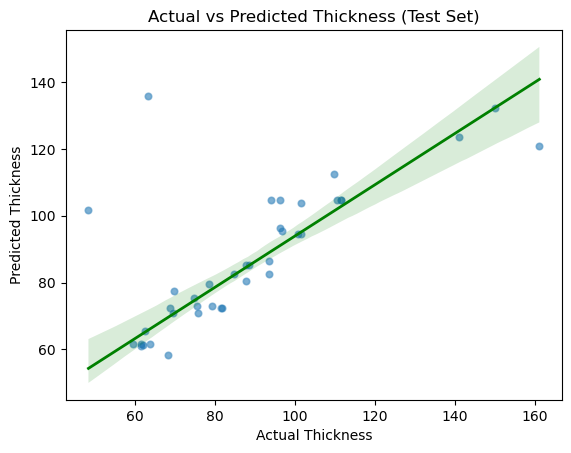

In [19]:
best_model, y_pred, test_pred = SP3.summarize(metric='RMSE')

## Histogram Equalization with Bot

Top, Bot RGB 평균 + Histogram equalization -> Thickness 예측

In [20]:
trial_name = 'tpot_Histogram_Equalization_w_B/'
dataset = pd.read_csv('../data/Histogram_Equalization_w_B.csv')
hyperparams_path = '../hyperparams.json'
model_path = './model/' + trial_name
pred_path = './prediction/' + trial_name
target_name = 'Thickness'
test_size = 0.3
random_state = 42

SP4 = Solar_pipeline(dataset, target_name, hyperparams_path, model_path, pred_path,
                    tpot=tpot, except_model = Except_models, test_size=test_size, random_state=random_state)

In [21]:
SP4.display_dataset()

,Top_R,Top_G,Top_B,Bot_R,Bot_G,Bot_B,Thickness
0,140.5183,139.7240,137.0516,130.1523,138.1153,149.4018,48.266667
1,139.2869,139.6661,138.1536,130.1640,139.3454,146.6704,47.966667
2,139.9864,140.2005,137.4057,132.8199,138.3944,142.8911,48.166667
3,140.2039,140.1815,137.5420,131.3105,139.1805,145.0480,48.600000
4,146.7461,144.1289,143.1082,131.9079,139.2374,143.4036,59.533333


In [22]:
SP4.fit()

Version 0.12.0 of tpot is outdated. Version 0.12.1 was released Tuesday August 15, 2023.


Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -74.36486242023373

Generation 2 - Current best internal CV score: -64.20729105007649

Generation 3 - Current best internal CV score: -62.76520163597237

Generation 4 - Current best internal CV score: -62.76520163597237

Generation 5 - Current best internal CV score: -62.76520163597237

Best pipeline: AdaBoostRegressor(XGBRegressor(LassoLarsCV(input_matrix, normalize=True), learning_rate=0.001, max_depth=8, min_child_weight=8, n_estimators=100, n_jobs=1, objective=reg:squarederror, subsample=0.9000000000000001, verbosity=0), learning_rate=1.0, loss=linear, n_estimators=100)
R2        0.693927
RMSE     13.570836
MSE     184.167599
MAE       7.909230
MAPE     10.365510
Name: tpot, dtype: float64


In [23]:
SP4.display_perf_table(metric = 'RMSE')

,R2,RMSE,MSE,MAE,MAPE
tpot,0.69393,13.57084,184.1676,7.90923,10.36551


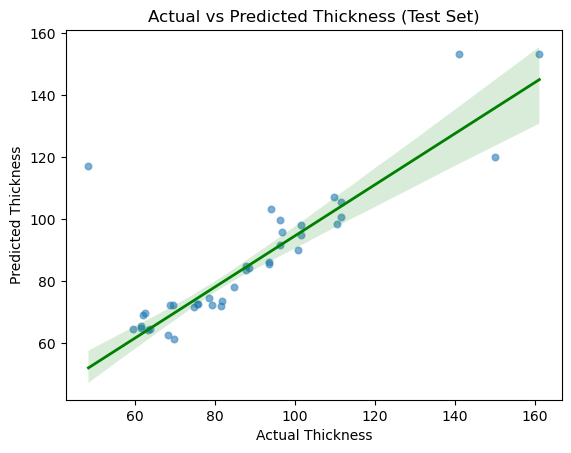

In [24]:
best_model, y_pred, test_pred = SP4.summarize(metric='RMSE')

## Zscore Normalization

Top RGB 평균 + Zscore Normalization -> Thickness 예측

In [25]:
trial_name = 'tpot_Zscore_Normalization/'
dataset = pd.read_csv('../data/Zscore_Normalization.csv')
hyperparams_path = '../hyperparams.json'
model_path = './model/' + trial_name
pred_path = './prediction/' + trial_name
target_name = 'Thickness'
test_size = 0.3
random_state = 42

SP5 = Solar_pipeline(dataset, target_name, hyperparams_path, model_path, pred_path,
                    tpot=tpot, except_model = Except_models, test_size=test_size, random_state=random_state)

In [26]:
SP5.display_dataset()

,Top_R,Top_G,Top_B,Thickness
0,0.404752,0.184016,-0.588784,48.266667
1,0.078087,0.193500,-0.271588,47.966667
2,0.239253,0.304375,-0.543628,48.166667
3,0.268439,0.281018,-0.549452,48.600000
4,0.744024,-0.132130,-0.611919,59.533333


In [27]:
SP5.fit()

Version 0.12.0 of tpot is outdated. Version 0.12.1 was released Tuesday August 15, 2023.


Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Best pipeline: DecisionTreeRegressor(Normalizer(input_matrix, norm=l1), max_depth=8, min_samples_leaf=12, min_samples_split=7)
R2       -0.042150
RMSE     25.041437
MSE     627.073572
MAE      13.296340
MAPE     12.871647
Name: tpot, dtype: float64


In [28]:
SP5.display_perf_table(metric = 'RMSE')

,R2,RMSE,MSE,MAE,MAPE
tpot,-0.04215,25.04144,627.07357,13.29634,12.87165


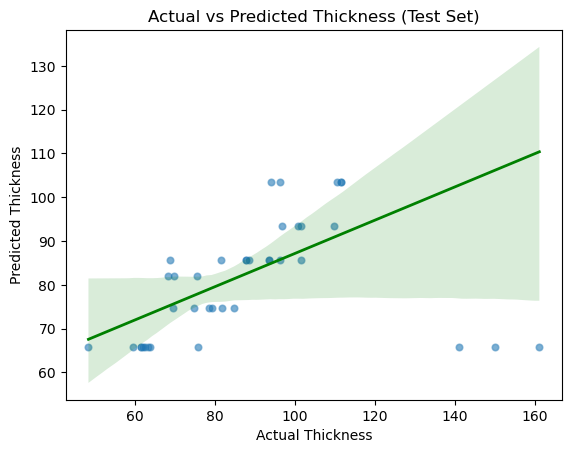

In [29]:
best_model, y_pred, test_pred = SP5.summarize(metric='RMSE')

## Zscore Normalization with Bot

Top, Bot RGB 평균 + Zscore Normalization -> Thickness 예측

In [30]:
trial_name = 'tpot_Zscore_Normalization_w_B/'
dataset = pd.read_csv('../data/Zscore_Normalization_w_B.csv')
hyperparams_path = '../hyperparams.json'
model_path = './model/' + trial_name
pred_path = './prediction/' + trial_name
target_name = 'Thickness'
test_size = 0.3
random_state = 42

SP6 = Solar_pipeline(dataset, target_name, hyperparams_path, model_path, pred_path,
                    tpot=tpot, except_model = Except_models, test_size=test_size, random_state=random_state)

In [31]:
SP6.display_dataset()

,Top_R,Top_G,Top_B,Bot_R,Bot_G,Bot_B,Thickness
0,0.404752,0.184016,-0.588784,-1.008400,-0.144374,1.152771,48.266667
1,0.078087,0.193500,-0.271588,-1.066301,0.030655,1.035654,47.966667
2,0.239253,0.304375,-0.543628,-0.846492,-0.059919,0.906468,48.166667
3,0.268439,0.281018,-0.549452,-1.012692,0.020495,0.992185,48.600000
4,0.744024,-0.132130,-0.611919,-0.968173,0.059892,0.908289,59.533333


In [32]:
SP6.fit()

Version 0.12.0 of tpot is outdated. Version 0.12.1 was released Tuesday August 15, 2023.


Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -165.22140945061415

Generation 2 - Current best internal CV score: -163.83452210161323

Generation 3 - Current best internal CV score: -158.5643056185044

Generation 4 - Current best internal CV score: -154.65024627279266

Generation 5 - Current best internal CV score: -154.65024627279266

Best pipeline: AdaBoostRegressor(Normalizer(input_matrix, norm=max), learning_rate=1.0, loss=linear, n_estimators=100)
R2       0.843141
RMSE     9.715130
MSE     94.383758
MAE      7.203787
MAPE     7.838260
Name: tpot, dtype: float64


In [33]:
SP6.display_perf_table(metric = 'RMSE')

,R2,RMSE,MSE,MAE,MAPE
tpot,0.84314,9.71513,94.38376,7.20379,7.83826


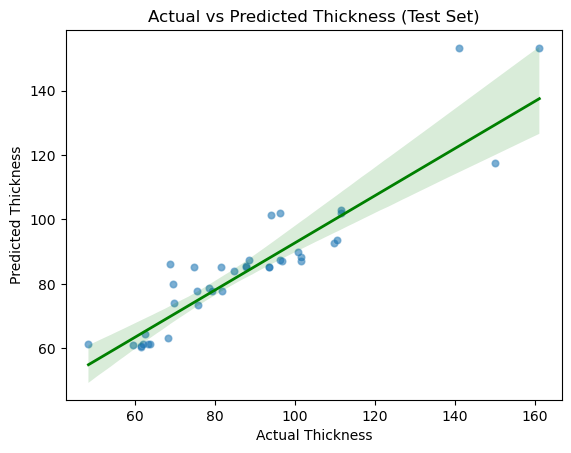

In [34]:
best_model, y_pred, test_pred = SP6.summarize(metric='RMSE')

## MinMax Normalization

Top RGB 평균 + MinMax Normalization -> Thickness 예측

In [35]:
trial_name = 'tpot_MinMax_Normalization/'
dataset = pd.read_csv('../data/MinMax_Normalization.csv')
hyperparams_path = '../hyperparams.json'
model_path = './model/' + trial_name
pred_path = './prediction/' + trial_name
target_name = 'Thickness'
test_size = 0.3
random_state = 42

SP7 = Solar_pipeline(dataset, target_name, hyperparams_path, model_path, pred_path,
                    tpot=tpot, except_model = Except_models, test_size=test_size, random_state=random_state)

In [36]:
SP7.display_dataset()

,Top_R,Top_G,Top_B,Thickness
0,0.417672,0.389686,0.291707,48.266667
1,0.458068,0.472150,0.415392,47.966667
2,0.422472,0.429908,0.333076,48.166667
3,0.438525,0.440173,0.331256,48.600000
4,0.324013,0.179397,0.100209,59.533333


In [37]:
SP7.fit()

Version 0.12.0 of tpot is outdated. Version 0.12.1 was released Tuesday August 15, 2023.


Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -118.73714329287364

Generation 2 - Current best internal CV score: -118.73714329287364

Generation 3 - Current best internal CV score: -118.73714329287364

Generation 4 - Current best internal CV score: -103.44973428193343

Generation 5 - Current best internal CV score: -103.44973428193343

Best pipeline: DecisionTreeRegressor(FastICA(input_matrix, tol=0.0), max_depth=3, min_samples_leaf=8, min_samples_split=11)
R2        0.764208
RMSE     11.911298
MSE     141.879028
MAE       8.835728
MAPE      9.559118
Name: tpot, dtype: float64


In [38]:
SP7.display_perf_table(metric = 'RMSE')

,R2,RMSE,MSE,MAE,MAPE
tpot,0.76421,11.9113,141.87903,8.83573,9.55912


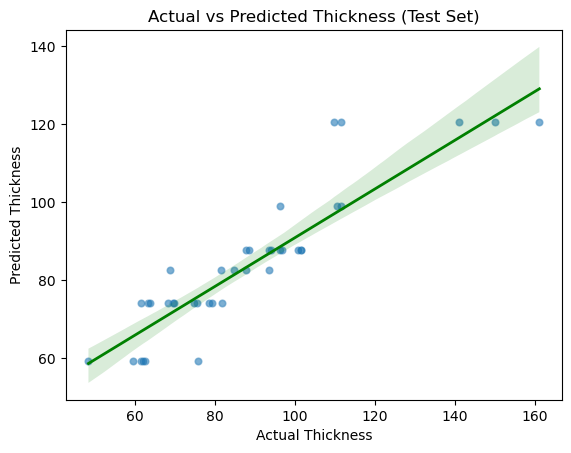

In [39]:
best_model, y_pred, test_pred = SP7.summarize(metric='RMSE')

## MinMax Normalization with Bot

Top, Bot RGB 평균 + MinMax Normalization -> Thickness 예측

In [40]:
trial_name = 'tpot_MinMax_Normalization_w_B/'
dataset = pd.read_csv('../data/MinMax_Normalization_w_B.csv')
hyperparams_path = '../hyperparams.json'
model_path = './model/' + trial_name
pred_path = './prediction/' + trial_name
target_name = 'Thickness'
test_size = 0.3
random_state = 42

SP8 = Solar_pipeline(dataset, target_name, hyperparams_path, model_path, pred_path,
                    tpot=tpot, except_model = Except_models, test_size=test_size, random_state=random_state)

In [41]:
SP8.display_dataset()

,Top_R,Top_G,Top_B,Bot_R,Bot_G,Bot_B,Thickness
0,0.417672,0.389686,0.291707,0.328109,0.452545,0.639358,48.266667
1,0.458068,0.472150,0.415392,0.315960,0.478439,0.627296,47.966667
2,0.422472,0.429908,0.333076,0.366387,0.457097,0.568553,48.166667
3,0.438525,0.440173,0.331256,0.324448,0.487210,0.640292,48.600000
4,0.324013,0.179397,0.100209,0.344793,0.473406,0.579551,59.533333


In [42]:
SP8.fit()

Version 0.12.0 of tpot is outdated. Version 0.12.1 was released Tuesday August 15, 2023.


Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -126.66557070819366

Generation 2 - Current best internal CV score: -108.36067558053291

Generation 3 - Current best internal CV score: -108.36067558053291

Generation 4 - Current best internal CV score: -74.51459824502368

Generation 5 - Current best internal CV score: -74.51459824502368

Best pipeline: ElasticNetCV(AdaBoostRegressor(FeatureAgglomeration(input_matrix, affinity=euclidean, linkage=ward), learning_rate=1.0, loss=square, n_estimators=100), l1_ratio=0.6000000000000001, tol=0.1)
R2        0.821255
RMSE     10.370774
MSE     107.552955
MAE       6.541623
MAPE      6.884431
Name: tpot, dtype: float64


In [43]:
SP8.display_perf_table(metric = 'RMSE')

,R2,RMSE,MSE,MAE,MAPE
tpot,0.82125,10.37077,107.55295,6.54162,6.88443


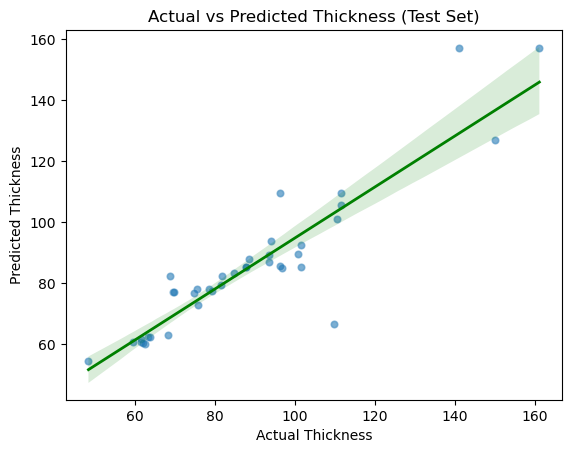

In [44]:
best_model, y_pred, test_pred = SP8.summarize(metric='RMSE')

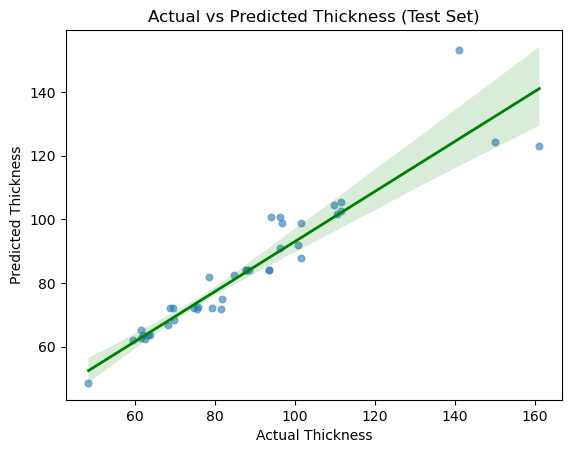

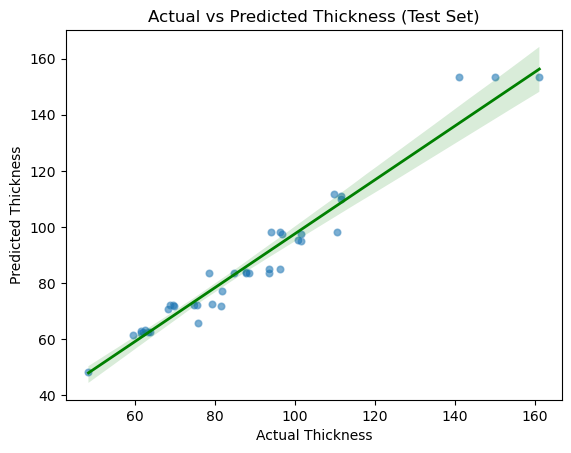

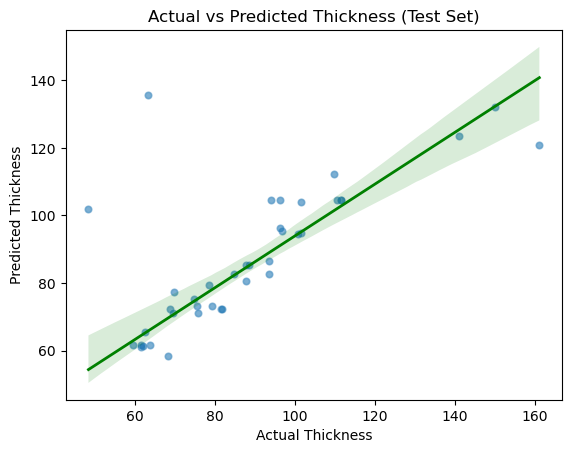

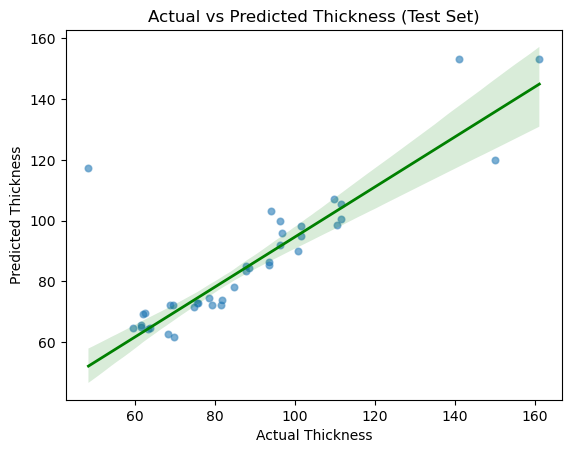

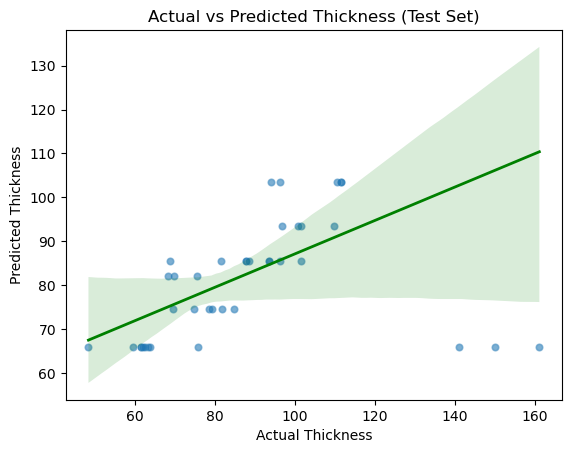

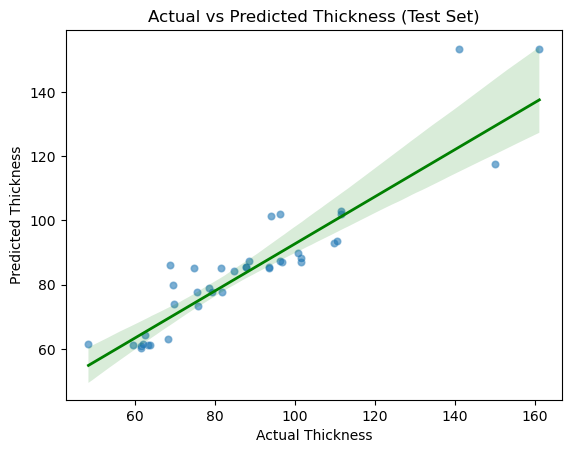

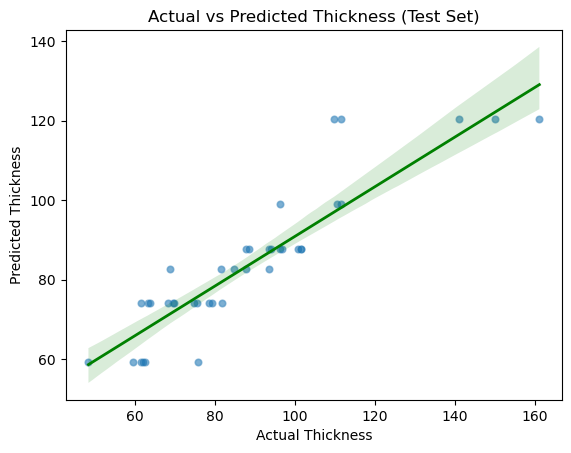

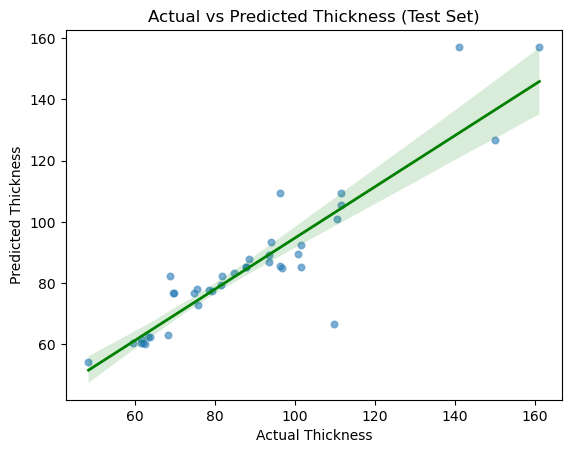

In [45]:
sp1_best_model, sp1_y_pred, sp1_test_pred = SP1.summarize(metric='RMSE')
sp2_best_model, sp2_y_pred, sp2_test_pred = SP2.summarize(metric='RMSE')
sp3_best_model, sp3_y_pred, sp3_test_pred = SP3.summarize(metric='RMSE')
sp4_best_model, sp4_y_pred, sp4_test_pred = SP4.summarize(metric='RMSE')
sp5_best_model, sp5_y_pred, sp5_test_pred = SP5.summarize(metric='RMSE')
sp6_best_model, sp6_y_pred, sp6_test_pred = SP6.summarize(metric='RMSE')
sp7_best_model, sp7_y_pred, sp7_test_pred = SP7.summarize(metric='RMSE')
sp8_best_model, sp8_y_pred, sp8_test_pred = SP8.summarize(metric='RMSE')

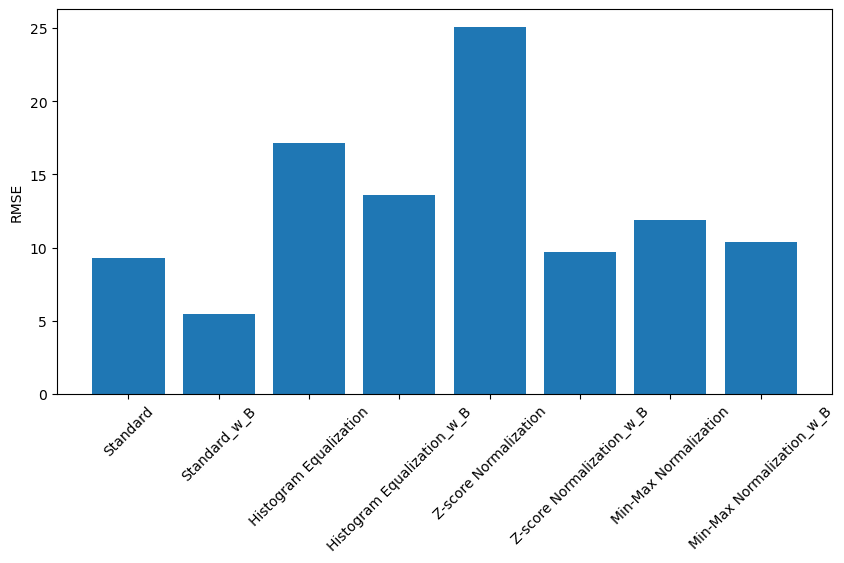

,Methods,RMSE
1,Standard_w_B,5.471975
0,Standard,9.274735
5,Z-score Normalization_w_B,9.715130
7,Min-Max Normalization_w_B,10.370774
6,Min-Max Normalization,11.911298
3,Histogram Equalization_w_B,13.570836
2,Histogram Equalization,17.140146
4,Z-score Normalization,25.041437


In [46]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
# Compare All Methods

methods = ['Standard','Standard_w_B',
           'Histogram Equalization','Histogram Equalization_w_B',
           'Z-score Normalization','Z-score Normalization_w_B',
           'Min-Max Normalization','Min-Max Normalization_w_B']

y_preds = [sp1_y_pred, sp2_y_pred, sp3_y_pred, sp4_y_pred, sp5_y_pred, sp6_y_pred, sp7_y_pred, sp8_y_pred]

#calculate RMSE
y_test = SP1.y_test

rmse = []
for y_pred in y_preds:
    rmse.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    
#plot
plt.figure(figsize=(10,5))
plt.bar(methods, rmse)
plt.xticks(rotation=45)
plt.ylabel('RMSE')
plt.show()

# Dataframe
RMSE_comparing = pd.DataFrame({'Methods':methods, 'RMSE':rmse})
display(RMSE_comparing.sort_values(by='RMSE'))